StoryTeller:
    
    We all know that In prepaid when we need sudden recharge or data, telecome companies offer us emergency data or talktime loan. 
    Sometime users used it in emergency but they didn't repayment it, which leads to loss for telecom companies at long time. Here we have past users data
    and we need to learn and train it to predict where user will repay loan or not?
    
    Let we discuss some topics here, suppose i take loan for main balance and i will not return then telecome company will stop all service, so if age of network is long means user repay loan to continue service.
    As Main balance and data balance is high so possibilities that user is genuine. Genuine user we can guess that will reacharge timely, balance is in sufficient amount then no of loan is low, loan amount should be low,median of amount should be low and avg payback time is also low.    

What is plan?
    
    First of all study basics about data like null values, data types, average.
    Check Co-relation between Each column.
    Then make data clean from Outliers

### Install libraries

In [1]:
import numpy as np     #For basic data study
import pandas as pd    #For DataFrame study and handling 
pd.get_option("display.max_columns") #show all columns

import matplotlib.pyplot as plt # both for Data Visulisation
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv('Data file.csv')
pd.get_option("display.max_columns",None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df.shape

(209593, 37)

In [5]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df.rename(columns = {'msisdn':'Mobile_number',
                     'aon':'Age_of_network',
                     'daily_decr30':'Daily_spent_30',
                     'daily_decr90':'Daily_spent_90',
                     'rental30':'main_balance_30',
                     'rental90':'main_balance_90',
                     'last_rech_date_ma':'last_recharge_main-ac',
                     'last_rech_date_da':'last_recharge_data-ac',
                     'last_rech_amt_ma':'Last_recharge_amount',
                     'cnt_ma_rech30':'No_of_recharge30',
                    'fr_ma_rech90':'Frequency_of_recharge',
                     'sumamnt_ma_rech30':'Total_amount_of_recharge',
                     'medianamnt_ma_rech30':'Median_of_recharge_amount',
                     'medianmarechprebal90':'Median_of_mainacc-balance',
                    'cnt_ma_rech90':'Number_of_recharge(90)','fr_ma_rech90':'Frequency_of_recharge(90)',
                     'sumamnt_ma_rech90':'Total_amount_of_recharge(90)',
                     'medianamnt_ma_rech90':'Median_of_recharge_amount(90)',
                    'cnt_da_rech30':'No_of_data_recharge','fr_da_rech30':'Frequency_of_datarecharge',
                     'cnt_da_rech90':'Number_of_datarecharge(90)','fr_da_rech90':'Frequency_of_datarecharge(90)',
                    'cnt_loans30':'No_of_loan(30)','amnt_loans30':'Loan_amount(30)',
                     'maxamnt_loans30':'Max_amount(30)','medianamnt_loans30':'Median_amount(30)',
                    'cnt_loans90':'No_of_loan(90)','amnt_loans90':'Loan_amount(90)',
                     'medianamnt_loans90':'Max_amount(90)','medianamnt_loans90':'Median_amount(90)',
                    'payback30':'Avg_paybacktime_30days','payback90':'Avg_paybacktime_90days','pcircle':'Telecom_circle','pdate':'Date','label':'Loan_repayment'}, inplace = True)
   

In [8]:
df.columns

Index(['Unnamed: 0', 'Loan_repayment', 'Mobile_number', 'Age_of_network',
       'Daily_spent_30', 'Daily_spent_90', 'main_balance_30',
       'main_balance_90', 'last_recharge_main-ac', 'last_recharge_data-ac',
       'Last_recharge_amount', 'No_of_recharge30', 'fr_ma_rech30',
       'Total_amount_of_recharge', 'Median_of_recharge_amount',
       'medianmarechprebal30', 'Number_of_recharge(90)',
       'Frequency_of_recharge(90)', 'Total_amount_of_recharge(90)',
       'Median_of_recharge_amount(90)', 'Median_of_mainacc-balance',
       'No_of_data_recharge', 'Frequency_of_datarecharge',
       'Number_of_datarecharge(90)', 'Frequency_of_datarecharge(90)',
       'No_of_loan(30)', 'Loan_amount(30)', 'Max_amount(30)',
       'Median_amount(30)', 'No_of_loan(90)', 'Loan_amount(90)',
       'maxamnt_loans90', 'Median_amount(90)', 'Avg_paybacktime_30days',
       'Avg_paybacktime_90days', 'Telecom_circle', 'Date'],
      dtype='object')

In [9]:
df = df.drop(['Unnamed: 0'],axis = 1)
df = df.drop(['Mobile_number'],axis = 1)


# Drop un-usefull columns and as we know that mobile number is not important factor in check that customer will repay or not

CHECK FOR NULL VALUES

In [10]:
df.isnull().sum()


#NO NULL VALUES FOUND IN DATASET

Loan_repayment                   0
Age_of_network                   0
Daily_spent_30                   0
Daily_spent_90                   0
main_balance_30                  0
main_balance_90                  0
last_recharge_main-ac            0
last_recharge_data-ac            0
Last_recharge_amount             0
No_of_recharge30                 0
fr_ma_rech30                     0
Total_amount_of_recharge         0
Median_of_recharge_amount        0
medianmarechprebal30             0
Number_of_recharge(90)           0
Frequency_of_recharge(90)        0
Total_amount_of_recharge(90)     0
Median_of_recharge_amount(90)    0
Median_of_mainacc-balance        0
No_of_data_recharge              0
Frequency_of_datarecharge        0
Number_of_datarecharge(90)       0
Frequency_of_datarecharge(90)    0
No_of_loan(30)                   0
Loan_amount(30)                  0
Max_amount(30)                   0
Median_amount(30)                0
No_of_loan(90)                   0
Loan_amount(90)     

In [11]:
df.info()

#BASIC DATA INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Loan_repayment                 209593 non-null  int64  
 1   Age_of_network                 209593 non-null  float64
 2   Daily_spent_30                 209593 non-null  float64
 3   Daily_spent_90                 209593 non-null  float64
 4   main_balance_30                209593 non-null  float64
 5   main_balance_90                209593 non-null  float64
 6   last_recharge_main-ac          209593 non-null  float64
 7   last_recharge_data-ac          209593 non-null  float64
 8   Last_recharge_amount           209593 non-null  int64  
 9   No_of_recharge30               209593 non-null  int64  
 10  fr_ma_rech30                   209593 non-null  float64
 11  Total_amount_of_recharge       209593 non-null  float64
 12  Median_of_recharge_amount     

In [12]:
df.describe()

#DATA CHECKING WITH THE STATATICAL VIEW

,Loan_repayment,Age_of_network,Daily_spent_30,Daily_spent_90,main_balance_30,main_balance_90,last_recharge_main-ac,last_recharge_data-ac,Last_recharge_amount,No_of_recharge30,...,No_of_loan(30),Loan_amount(30),Max_amount(30),Median_amount(30),No_of_loan(90),Loan_amount(90),maxamnt_loans90,Median_amount(90),Avg_paybacktime_30days,Avg_paybacktime_90days
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [13]:
df = df.round({"Daily_spent_30":2, "Daily_spent_90":2, "Avg_paybacktime_90days":2, "Avg_paybacktime_30days":2})


In [14]:
num = ['float64','int64']
my_df = df.select_dtypes(include=num)
my_df.sample(n=10)

,Loan_repayment,Age_of_network,Daily_spent_30,Daily_spent_90,main_balance_30,main_balance_90,last_recharge_main-ac,last_recharge_data-ac,Last_recharge_amount,No_of_recharge30,...,No_of_loan(30),Loan_amount(30),Max_amount(30),Median_amount(30),No_of_loan(90),Loan_amount(90),maxamnt_loans90,Median_amount(90),Avg_paybacktime_30days,Avg_paybacktime_90days
7589,1,1367.0,11.00,11.00,0.00,0.00,17.0,0.0,2320,1,...,1,6,6.0,1.0,1.0,6,6,1.0,0.00,0.00
192836,0,500.0,25.00,25.00,730.50,730.50,1.0,0.0,770,3,...,3,18,6.0,0.0,3.0,18,6,0.0,22.33,22.33
204393,1,1736.0,10674.00,11022.31,698.07,2090.63,3.0,0.0,770,5,...,5,30,6.0,0.0,7.0,42,6,0.0,2.50,3.43
116575,0,145.0,1664.22,1665.80,1256.78,1385.36,1.0,0.0,770,2,...,1,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00
147704,1,179.0,18310.53,18379.00,2982.09,4529.09,4.0,0.0,1539,9,...,8,48,6.0,0.0,10.0,60,6,0.0,2.43,3.11
127114,1,633.0,1812.78,1822.55,34.00,60.00,21.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00
63194,1,383.0,112.73,112.73,487.85,487.85,1.0,0.0,773,11,...,4,24,6.0,0.0,4.0,24,6,0.0,1.67,1.67
82646,1,1182.0,1006.13,1091.98,9588.06,9907.82,43.0,0.0,1539,0,...,1,6,6.0,0.0,5.0,30,6,0.0,0.00,2.25
25880,1,1377.0,6200.00,7492.81,2065.04,3920.39,4.0,0.0,1539,3,...,3,18,6.0,0.0,5.0,30,6,0.0,6.00,8.50
29660,1,1617.0,2296.00,2296.00,1815.13,1815.13,6.0,0.0,1924,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.00,0.00


In [15]:
df = df.drop(['Telecom_circle'], axis = 1)

#Drop Telecom circle column as it haveo only 1 variable so it will not affect the Target

C:\Users\Kishan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


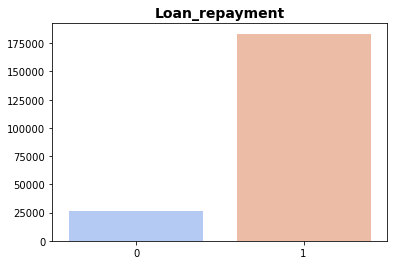

In [16]:
fig = sns.barplot(df['Loan_repayment'].value_counts().index,df['Loan_repayment'].value_counts().values, palette='coolwarm')
fig.set_title('Loan_repayment', fontsize=14, fontweight='bold')
plt.show()

#Loan repayment view

#Here, we can see that approx from 2 lakh people, 1.75 lakh customer repay the loan while 25000 customer failed to repay loan

Dimensionality Reduction

In [17]:
df['Daily_spent'] = ((df['Daily_spent_90']*3)+df['Daily_spent_30'])/4
df['main_balance'] = ((df['main_balance_90']*3)+df['main_balance_30'])/4
df['No_of_recharge'] = ((df['Number_of_recharge(90)']*3)+df['No_of_recharge30'])/4
df['fr_ma_rech30'] = ((df['Frequency_of_recharge(90)']*3)+df['fr_ma_rech30'])/4
df['Loan_amount'] = ((df['Loan_amount(90)']*3)+df['Loan_amount(30)'])/4
df['No_of_loan'] = ((df['No_of_loan(90)']*3)+df['No_of_loan(30)'])/4
df['Median_of_recharge_amount'] = ((df['Median_of_recharge_amount']*3)+df['Median_of_recharge_amount(90)'])/4
df['Total_amount_of_recharge'] = ((df['Total_amount_of_recharge(90)']*3)+df['Total_amount_of_recharge'])/4
df['Median_of_recharge_amount(90)'] = ((df['Median_of_recharge_amount']*3)+df['Median_of_recharge_amount(90)'])/4
df['Median_amount'] = ((df['Median_of_recharge_amount(90)']*3)+df['Median_of_recharge_amount'])/4
df['Max_amount'] = ((df['maxamnt_loans90']*3)+df['Max_amount(30)'])
df['Avg_paybacktime'] = ((df['Avg_paybacktime_90days']*3)+df['Avg_paybacktime_30days'])/4
df['Med_amount'] = ((df['Median_amount(90)']*3)+df['Median_amount(30)'])
df['Datarecharge_freq'] = ((df['Frequency_of_datarecharge(90)']*3)+df['Frequency_of_datarecharge'])/4
df['Datarecharge_No'] = ((df['Number_of_datarecharge(90)']*3)+df['No_of_data_recharge'])/4

In [18]:
df.drop(['Frequency_of_datarecharge(90)','Frequency_of_datarecharge','Number_of_datarecharge(90)','No_of_data_recharge','medianmarechprebal30'], axis = 1, inplace = True)
df.drop(['Daily_spent_30','Daily_spent_90','main_balance_30','Frequency_of_recharge(90)','main_balance_30','main_balance_90','No_of_recharge30','Number_of_recharge(90)','fr_ma_rech30','Loan_amount(30)','Loan_amount(90)','No_of_loan(30)','No_of_loan(90)','maxamnt_loans90','Max_amount(30)','Median_of_recharge_amount','Median_of_recharge_amount(90)','Total_amount_of_recharge(90)','Total_amount_of_recharge','Median_of_recharge_amount(90)','Median_of_recharge_amount','Avg_paybacktime_30days','Avg_paybacktime_90days','Median_amount(30)','Median_amount(90)'], axis = 1, inplace = True)

#Drop columns which are concated and new columns generated

In [19]:
df.columns

Index(['Loan_repayment', 'Age_of_network', 'last_recharge_main-ac',
       'last_recharge_data-ac', 'Last_recharge_amount',
       'Median_of_mainacc-balance', 'Date', 'Daily_spent', 'main_balance',
       'No_of_recharge', 'Loan_amount', 'No_of_loan', 'Median_amount',
       'Max_amount', 'Avg_paybacktime', 'Med_amount', 'Datarecharge_freq',
       'Datarecharge_No'],
      dtype='object')

In [20]:
Main_recharge_loan_repay = df.groupby(['Loan_repayment']).apply(lambda df: round(df['last_recharge_main-ac'].mean(), 0))
print(Main_recharge_loan_repay)

#Last recharge average amount for Loan repayment and Loan failure. 
#For loan repayment success account it is higher than failure account

Loan_repayment
0    3224.0
1    3832.0
dtype: float64


In [21]:
last_recharge_repay = df.groupby(['Loan_repayment']).apply(lambda df: round(df['last_recharge_data-ac'].mean(), 0))
print(last_recharge_repay)

Loan_repayment
0    3470.0
1    3747.0
dtype: float64


In [22]:
amount_repay = df.groupby(['Loan_repayment']).apply(lambda df: round(df['Last_recharge_amount'].mean(), 0))
print(amount_repay)

#For successfull repayment account, average last amount recharge is quite higher than failure account

Loan_repayment
0    1237.0
1    2182.0
dtype: float64


In [23]:
median_repay = df.groupby(['Loan_repayment']).apply(lambda df: round(df['Median_of_mainacc-balance'].mean(), 0))
print(median_repay)

#For successfull repayment account, Median of main account balance is quite higher than failure account

Loan_repayment
0    54.0
1    98.0
dtype: float64


In [24]:
Main_balance_repay = df.groupby(['Loan_repayment']).apply(lambda df: round(df['Daily_spent'].mean(), 0))
print(Main_balance_repay)

#Customer who successfully repay loan ammount have higher daily spent average

Loan_repayment
0    1277.0
1    6568.0
dtype: float64


In [25]:
avg_payback_repay = df.groupby(['Loan_repayment']).apply(lambda df: round(df['Avg_paybacktime'].mean(), 0))
print(avg_payback_repay)

#there is slight difference between both which may not affect the dataset

Loan_repayment
0    3.0
1    4.0
dtype: float64


In [26]:
noof_recharge_repay = df.groupby(['Loan_repayment']).apply(lambda df: round(df['No_of_recharge'].mean(), 0))
print(noof_recharge_repay)

#Customer who repay the loan have higher average of number of recharge 

Loan_repayment
0    2.0
1    6.0
dtype: float64


## EXPLORATORY DATA ANALYSIS

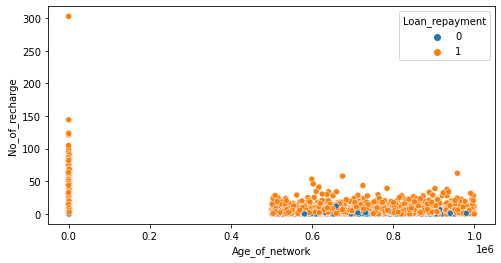

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age_of_network',y='No_of_recharge',hue = 'Loan_repayment',data=df)

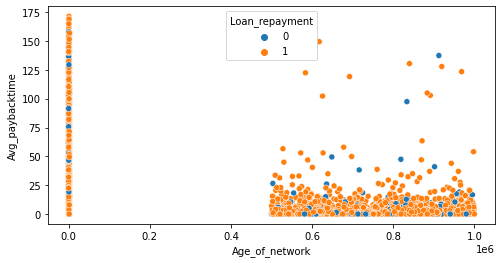

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age_of_network',y='Avg_paybacktime',hue = 'Loan_repayment',data=df)

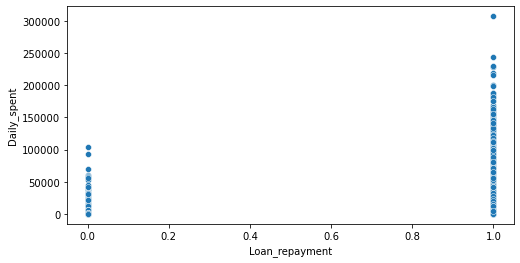

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Loan_repayment',y='Daily_spent',data=df)

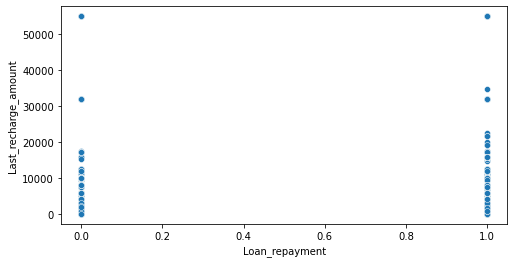

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Loan_repayment',y='Last_recharge_amount',data=df)

From above graphs, we can see that much data with 0 values are there which are not healthy for 
our model building because we can not get any conclusion from it.

In [31]:
df.drop(['Date'],axis = 1, inplace = True)
df.dtypes

#here, i drop date column as we have separate columns for 30 days and 90 days data which we concated

Loan_repayment                 int64
Age_of_network               float64
last_recharge_main-ac        float64
last_recharge_data-ac        float64
Last_recharge_amount           int64
Median_of_mainacc-balance    float64
Daily_spent                  float64
main_balance                 float64
No_of_recharge               float64
Loan_amount                  float64
No_of_loan                   float64
Median_amount                float64
Max_amount                   float64
Avg_paybacktime              float64
Med_amount                   float64
Datarecharge_freq            float64
Datarecharge_No              float64
dtype: object

### OUTLIER DETECTION

In [32]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score< 5).all(axis=1)]
print(df_1.shape)

#By using z-score method, we remove outliers where z score is over 5

(209593, 17)
(195541, 17)


In [33]:
print ('outlier removed',209593-195541)
print('%data are removed as outliers',100*14052 /209593)

outlier removed 14052
%data are removed as outliers 6.704422380518434


In [34]:
df = df_1
df.columns

Index(['Loan_repayment', 'Age_of_network', 'last_recharge_main-ac',
       'last_recharge_data-ac', 'Last_recharge_amount',
       'Median_of_mainacc-balance', 'Daily_spent', 'main_balance',
       'No_of_recharge', 'Loan_amount', 'No_of_loan', 'Median_amount',
       'Max_amount', 'Avg_paybacktime', 'Med_amount', 'Datarecharge_freq',
       'Datarecharge_No'],
      dtype='object')

In [35]:
df.drop(df[df['No_of_loan'] == 0].index, inplace = True)

#Let me drop No of loan = 0, because it customer had not taken any loan then there no question to loan repay or not

In [36]:
df.shape

(193685, 17)

In [37]:
df.describe()

,Loan_repayment,Age_of_network,last_recharge_main-ac,last_recharge_data-ac,Last_recharge_amount,Median_of_mainacc-balance,Daily_spent,main_balance,No_of_recharge,Loan_amount,No_of_loan,Median_amount,Max_amount,Avg_paybacktime,Med_amount,Datarecharge_freq,Datarecharge_No
count,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000,193685.000000
mean,0.872158,652.670795,5.905666,0.905677,1985.543331,78.221016,5264.180029,2977.725190,5.480281,21.543604,3.505992,1762.929000,37.435396,3.506119,0.179183,0.037444,3.109079
std,0.333914,498.501700,9.508187,6.846454,2135.456785,144.660161,8403.407713,4428.217573,5.508764,20.826103,10.555075,1815.531861,397.854854,6.075824,0.742388,0.749629,107.238376
min,0.000000,-48.000000,-29.000000,-29.000000,0.000000,-200.000000,-46.220000,-7786.750000,0.000000,4.500000,0.750000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,242.000000,1.000000,0.000000,770.000000,14.470000,40.020000,291.775000,1.750000,6.000000,1.000000,771.171875,24.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,517.000000,3.000000,0.000000,1539.000000,35.500000,1315.817500,1227.660000,3.750000,12.000000,2.000000,1539.000000,24.000000,1.640000,0.000000,0.000000,0.000000
75%,1.000000,960.000000,7.000000,0.000000,2309.000000,78.000000,7238.400000,3770.440000,7.750000,28.500000,4.500000,1924.000000,24.000000,4.432500,0.000000,0.000000,0.000000
max,1.000000,2440.000000,113.000000,115.000000,12500.000000,1936.100000,58176.437500,30112.452500,37.500000,141.000000,851.656836,11828.125000,21421.969154,52.252500,4.000000,48.000000,5271.942281


In [38]:
df1 =df.loc[df['No_of_loan'] < 10]
df2 =df.loc[df['No_of_loan'] > 10]

In [39]:
print('Total Dataset',df.shape)
print('Less then 10 loan amount customer',df1.shape)
print('Greater then 10 loan amount customer',df2.shape)

#Most of Customer had taken loan less then 10 times

Total Dataset (193685, 17)
Less then 10 loan amount customer (183354, 17)
Greater then 10 loan amount customer (9388, 17)


In [40]:
df_fail =df.loc[df['Loan_repayment'] == 0]
df_success =df.loc[df['Loan_repayment'] == 1]

In [41]:
df_fail.shape , df_success.shape

((24761, 17), (168924, 17))

In [42]:
print('Loan_repay_failure_ratio',(24761*100/193685))

Loan_repay_failure_ratio 12.784159847174536


In [43]:
df.columns

Index(['Loan_repayment', 'Age_of_network', 'last_recharge_main-ac',
       'last_recharge_data-ac', 'Last_recharge_amount',
       'Median_of_mainacc-balance', 'Daily_spent', 'main_balance',
       'No_of_recharge', 'Loan_amount', 'No_of_loan', 'Median_amount',
       'Max_amount', 'Avg_paybacktime', 'Med_amount', 'Datarecharge_freq',
       'Datarecharge_No'],
      dtype='object')

In [44]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\kishan\anaconda3\lib\site-packages (0.11.2)



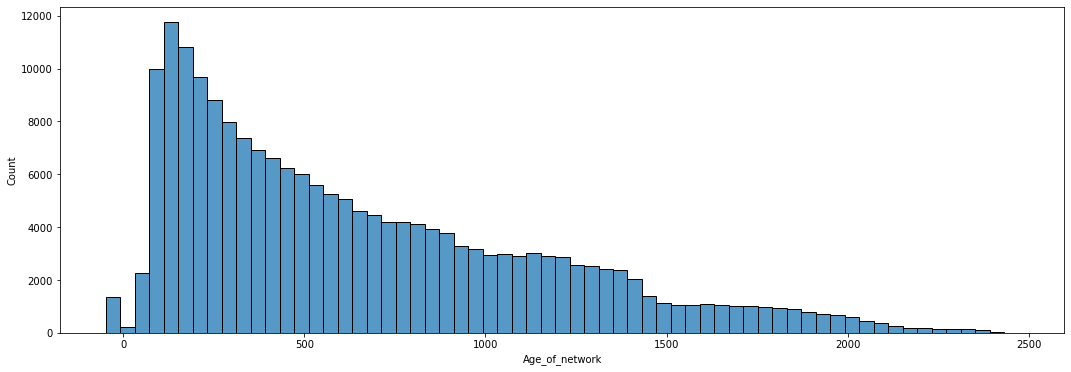

In [45]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Age_of_network", binwidth=40)

Age of Network is not normally distributed, most of data lying betweeen 0 to 500

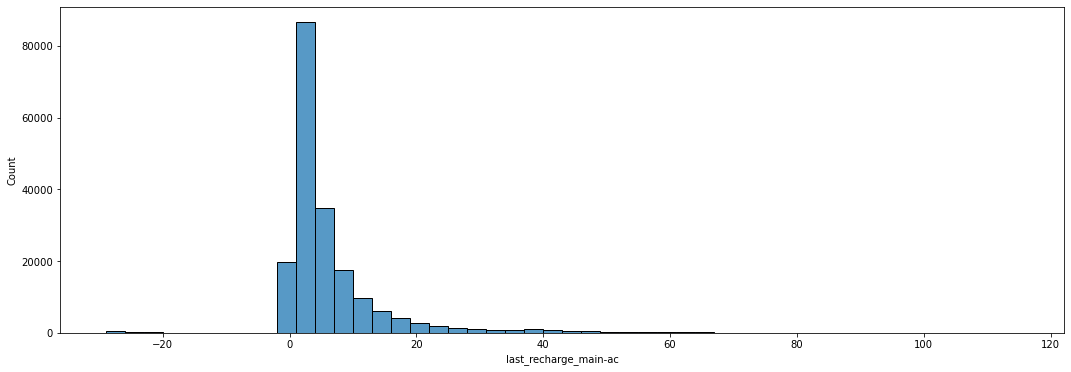

In [46]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="last_recharge_main-ac", binwidth=3)

Last recharge of main account data is also not normally distributed, data are lying between 0 to 25 but some data are in minus also and nearly 60-70 also

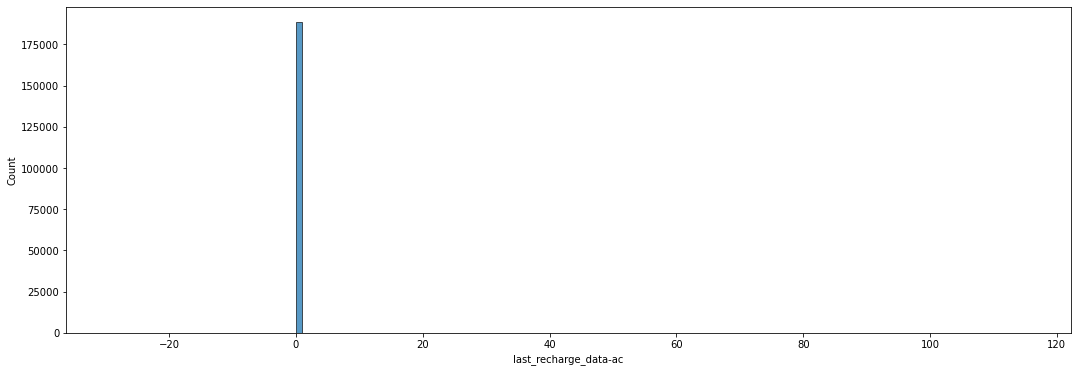

In [47]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="last_recharge_data-ac", binwidth=1)

In [48]:
df['last_recharge_data-ac'].unique()

array([  0.,  55.,  63.,  69.,  46.,  77.,  65.,  11.,   8.,   7.,  45.,
        24.,  30.,  39.,  44.,  76.,  60.,  19.,  12.,  43.,  20.,  14.,
         2.,   3.,  17.,   9.,  64., 107.,  27.,  16.,  10.,   5.,   6.,
        15.,  52.,  25.,  59.,  13.,  28.,  36., 100.,  40.,  41.,  94.,
       106.,  73.,  53.,  34.,  29.,  22.,  48.,  50.,  72.,  38.,  51.,
        92.,  49.,  37.,  42.,  23.,  75.,  61., 109.,  33.,  26.,  32.,
        78.,   4., 108.,  18.,  35., 105.,  21.,  93., 104.,   1.,  95.,
       103.,  71.,  67.,  86.,  58.,  79., -11.,  85.,  83.,  31.,  -2.,
        97.,  91.,  47.,  70.,  57.,  54.,  62.,  68.,  99., -27.,  66.,
       110.,  56.,  98.,  -1.,  84.,  -8.,  74., 111.,  88., 112., 101.,
       -14.,  87.,  89.,  82.,  96.,  80., 114., -12., 113., -29., -16.,
       102.,  81., -24., 115., -22.,  90.])

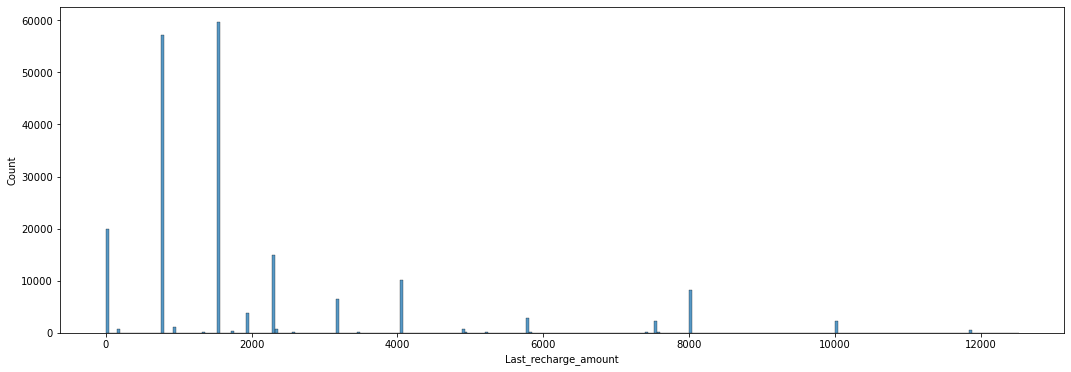

In [49]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Last_recharge_amount", binwidth=40)

Last recharge amount is slightly scattered but most of data are lying between 0 to 1800

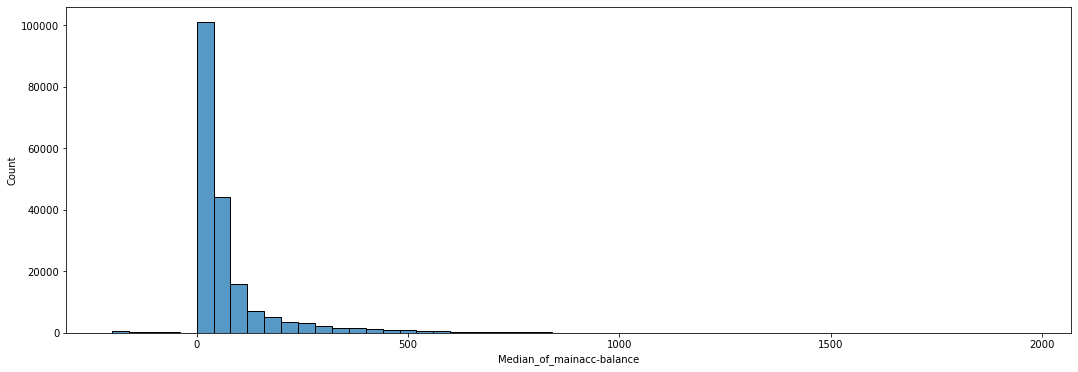

In [50]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Median_of_mainacc-balance", binwidth=40)

Median of main account balance is lying between 0 to 500 

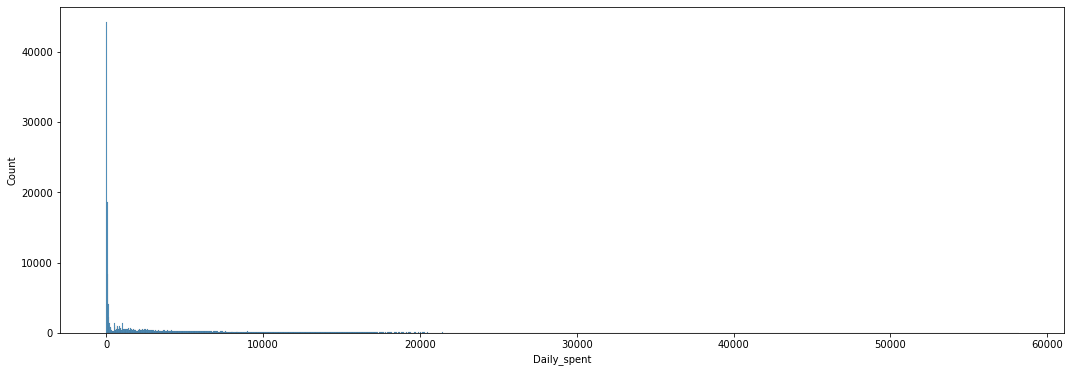

In [51]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Daily_spent", binwidth=40)

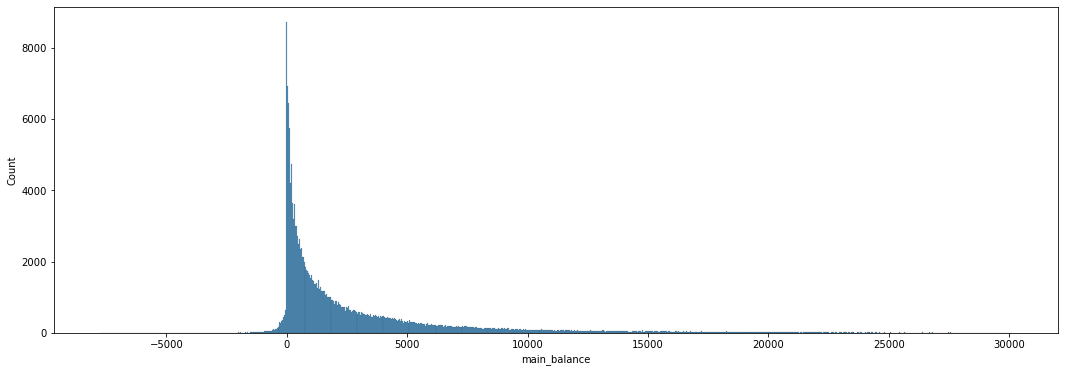

In [52]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="main_balance", binwidth=40)

Higher parts of dataset lying between 0 to 5000 for main balance

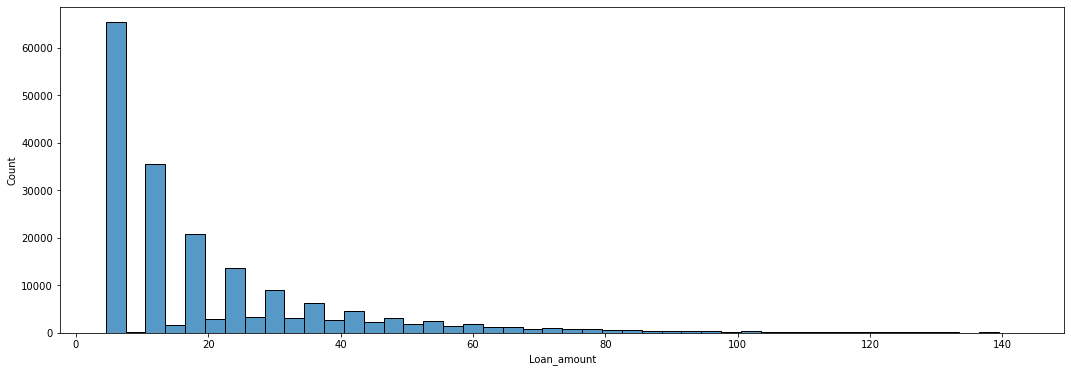

In [53]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Loan_amount", binwidth=3)

Loan amount data is highly lying near 0 to 20 and max till 140

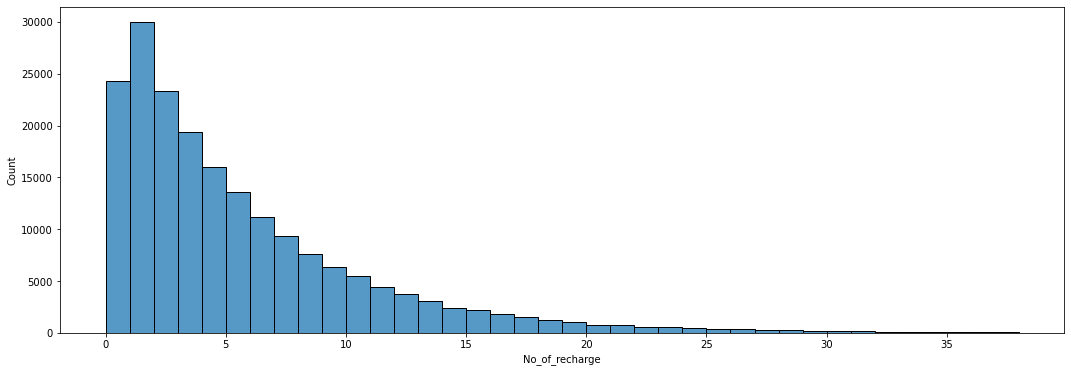

In [54]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="No_of_recharge", binwidth=1)

No of recharge are lying near 0 to 10

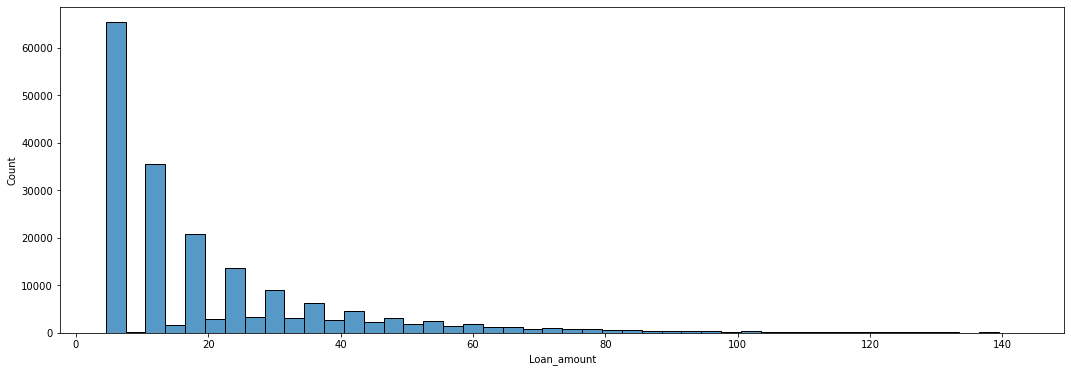

In [55]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Loan_amount", binwidth=3)

Loan amount data is lying near 5 to 20  and max till 140

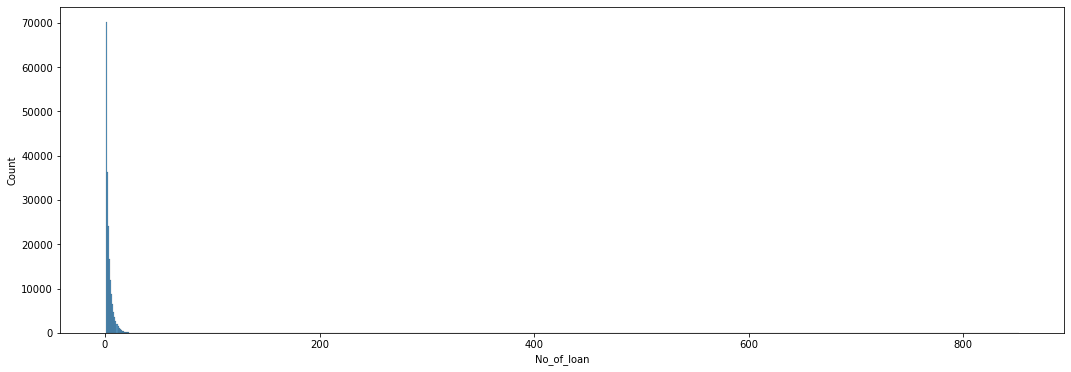

In [56]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="No_of_loan", binwidth=1)

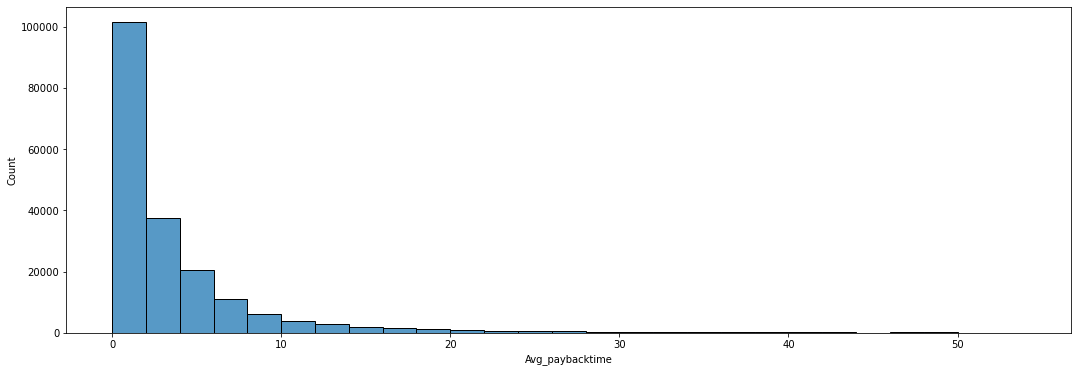

In [57]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Avg_paybacktime", binwidth=2)

Generally customer paid loan in 1 to 7 days and some customer paid it near 50 days also

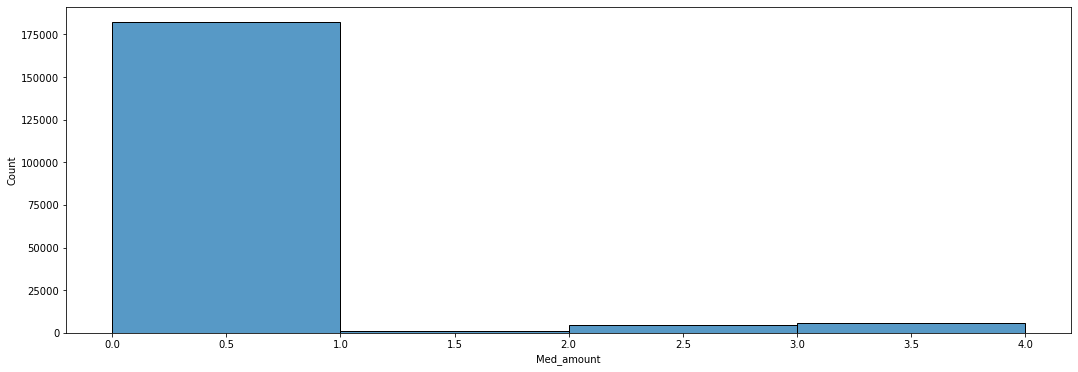

In [58]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Med_amount", binwidth=1)

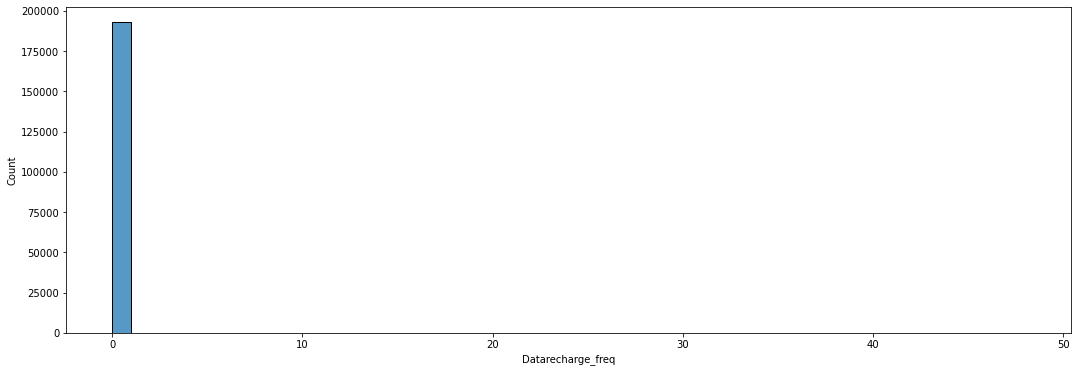

In [59]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Datarecharge_freq", binwidth=1)

Data recharge frequency is near 0 means mostly people are not going for datarecharge

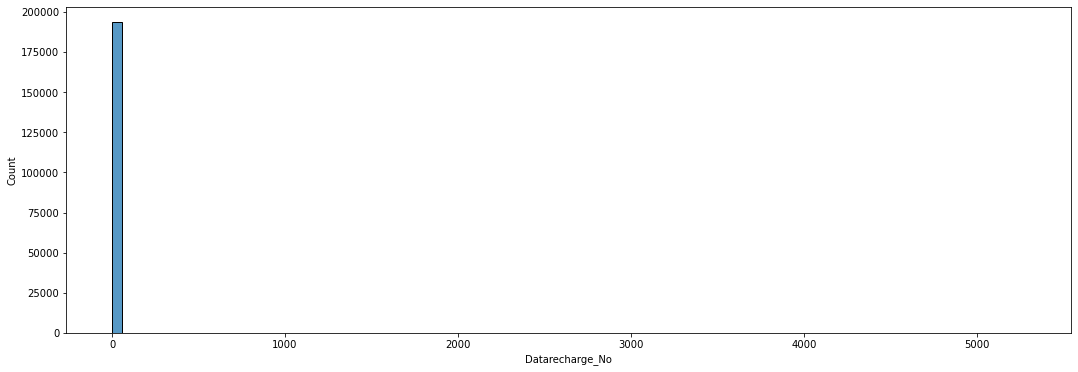

In [60]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Datarecharge_No", binwidth=60)

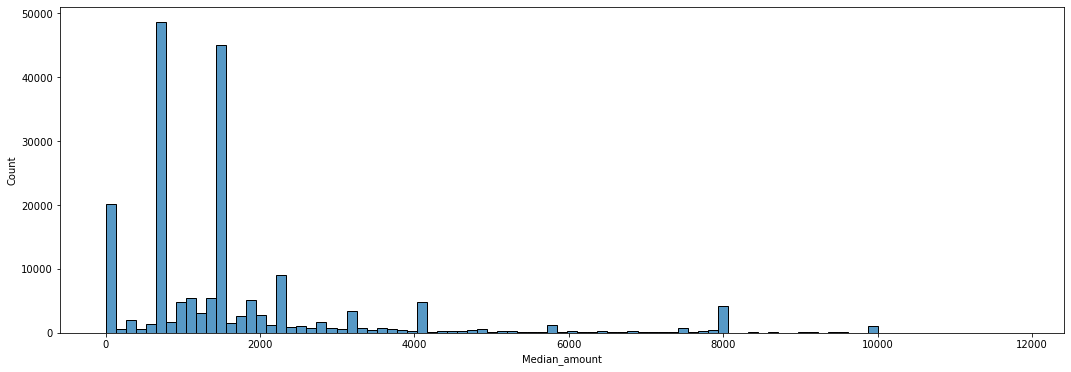

In [61]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Median_amount", binwidth=130)

Median amount of recharge is between 1 to 2000 and high neat 500-600

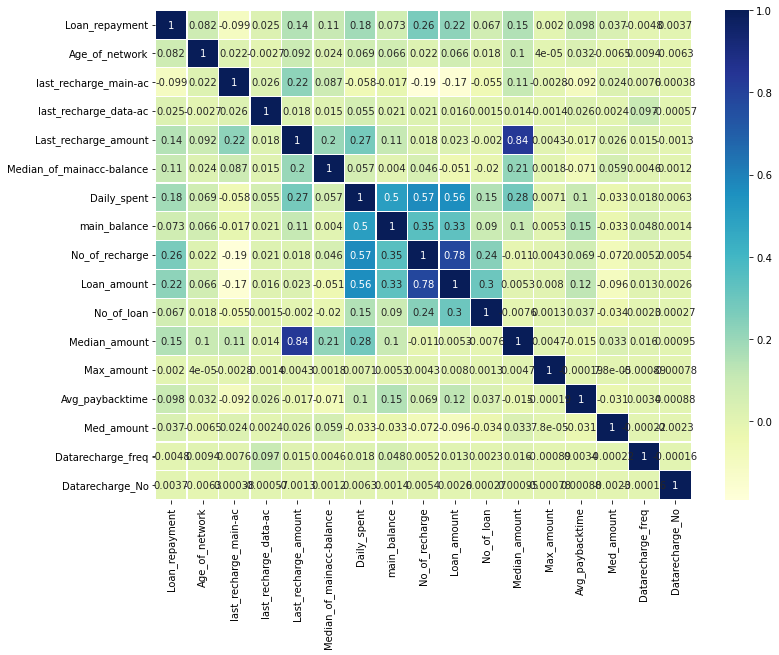

In [62]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),vmax=1,annot = True,linewidth=0.1,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

Conclusion from hist chart:
    
    Loan repayment is highly co-related to 'No of recharge' and 'loan amount'
    Median recharge amount is co-related with last recharge amount
    No of recharge have good co-relation with loan amount
    no of recharge have also relation with daily spent
    
    Last recharge of main account and no of recharge have negative corelation with each other 
    and same for Loan amount and Last recharge of main account
    

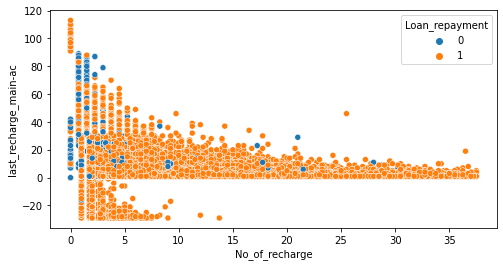

In [63]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='No_of_recharge',y='last_recharge_main-ac',hue = 'Loan_repayment',data=df)

As number of recharge is low, loan repayment failure ratio is going to increase. Customer have minus balance are repay the loan, may be service
continuition is factor.

Loan repayment failure can be visulise where last recharge amount is from 0 to 80

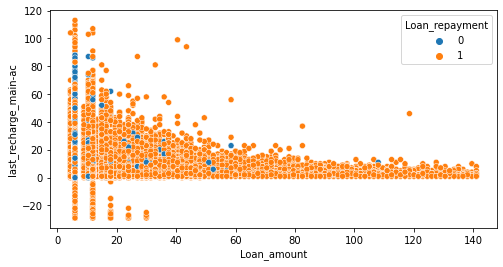

In [64]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Loan_amount',y='last_recharge_main-ac',hue = 'Loan_repayment',data=df)

As Loan amount is low then recharge amount of mail account is higher. as per visulisation, loan repayment is not much looking related with it

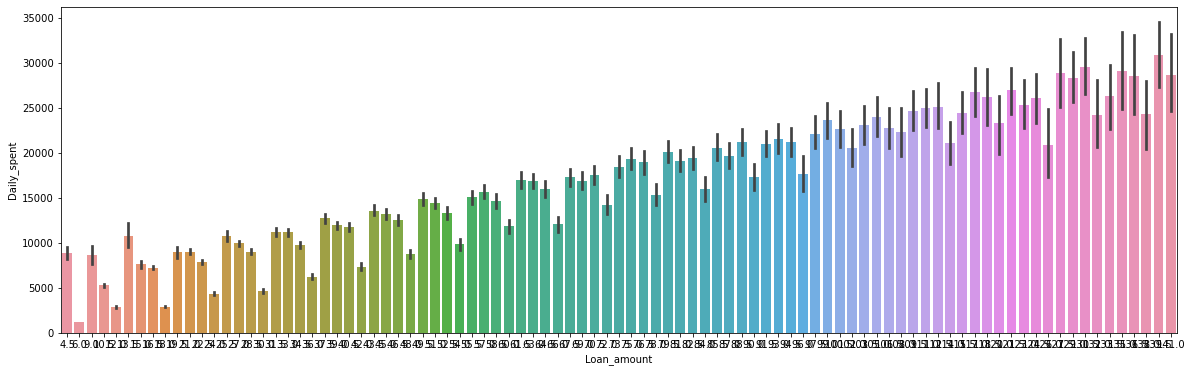

In [65]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='Daily_spent',data = df)

Loan amount is higher then daily spend is also going to increase

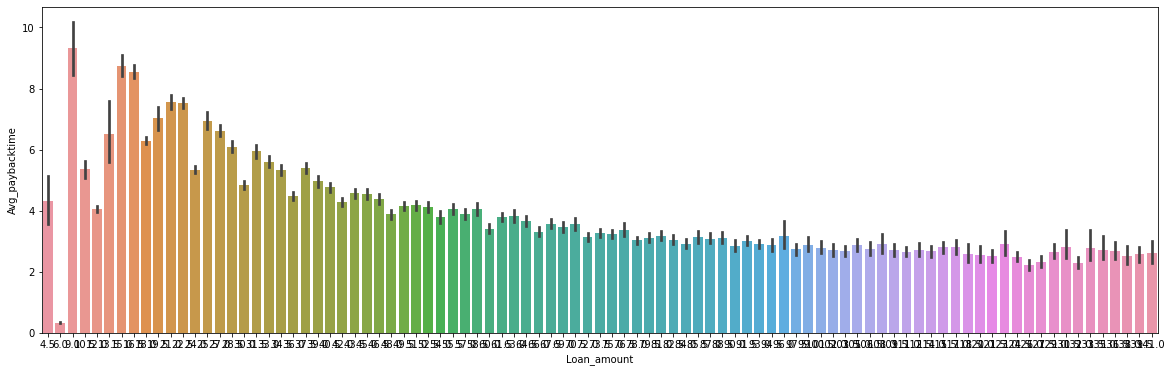

In [66]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='Avg_paybacktime',data = df)

As per trend, if loan amount is low then avg payback time is low

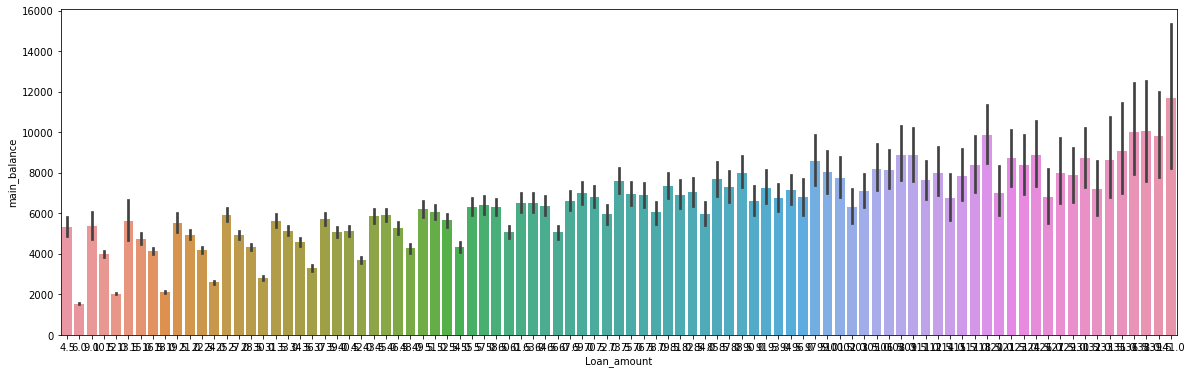

In [67]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='main_balance',data = df)

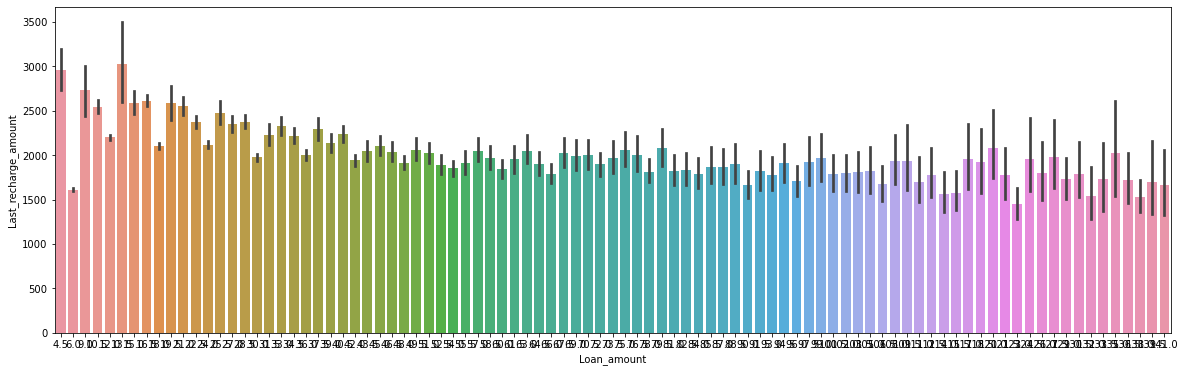

In [68]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='Last_recharge_amount',data = df)

when Loan amount is low then last recharge amount is high and as recharge amount goes to low then loan amount is goes high

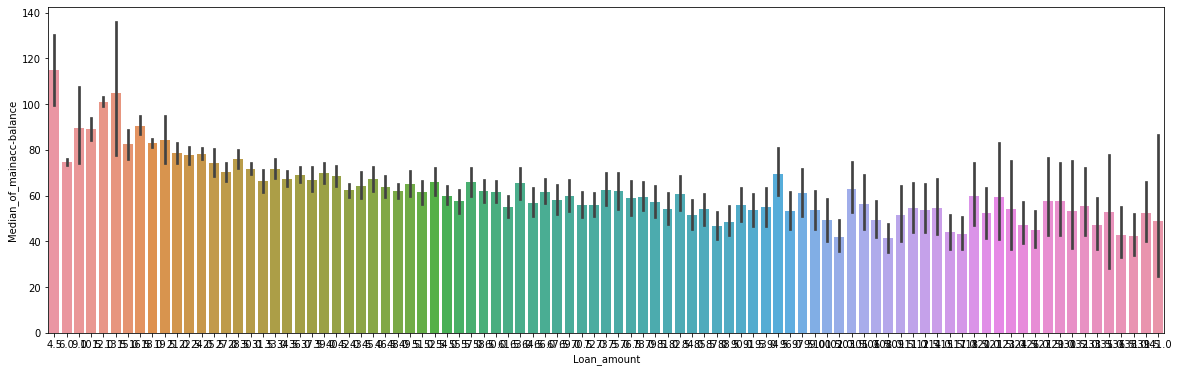

In [69]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='Median_of_mainacc-balance',data = df)

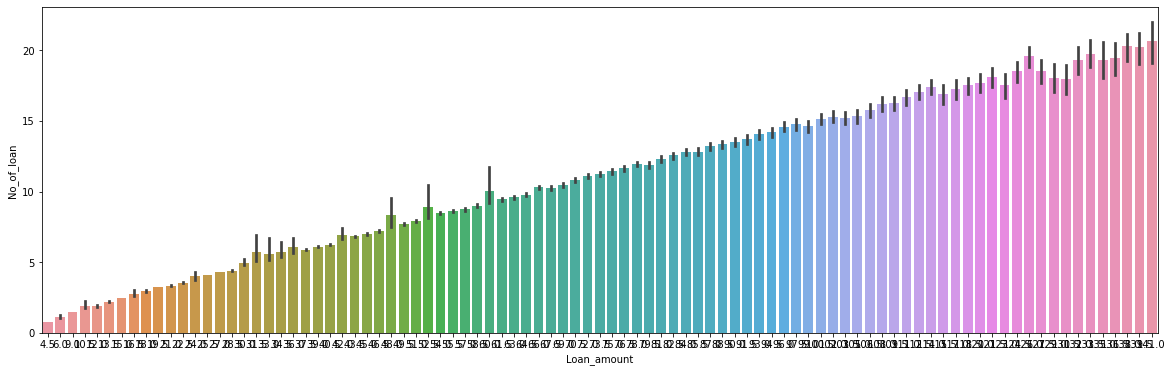

In [70]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='No_of_loan',data = df)

No of loan and loan amount are increasing parellelly

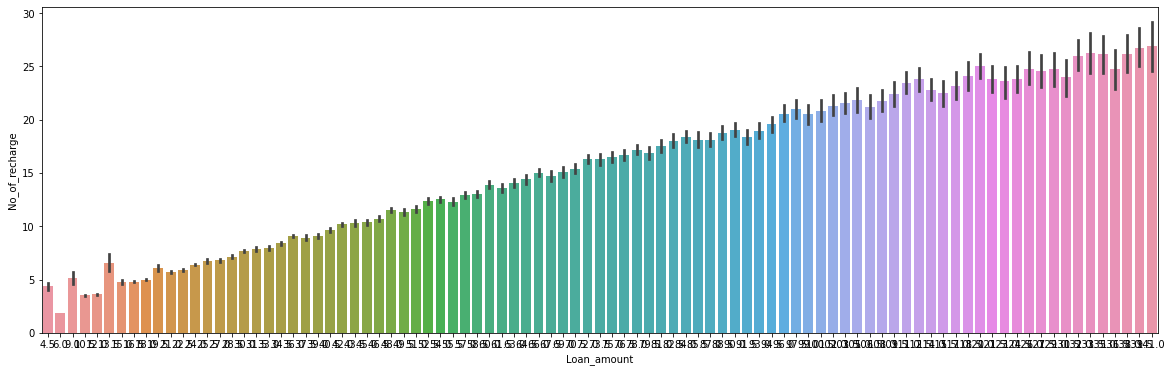

In [71]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='No_of_recharge',data = df)

No of recharge and loan amount are increasing parellelly

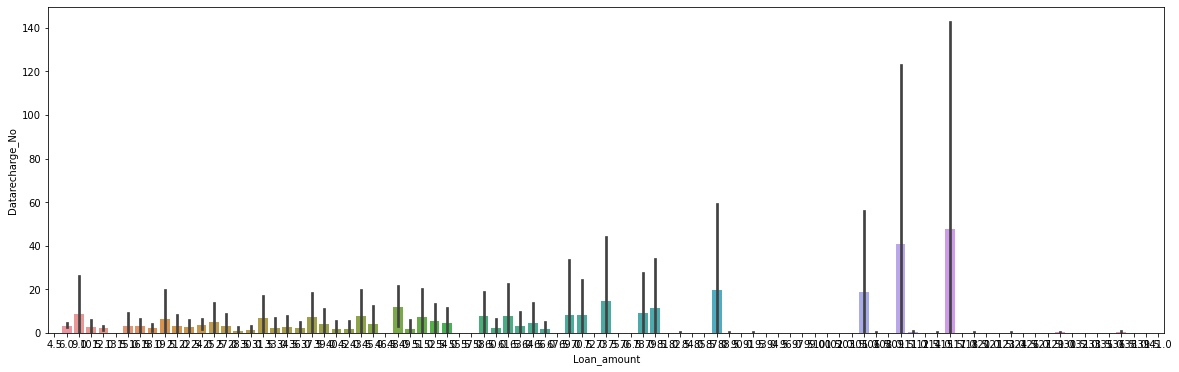

In [72]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='Datarecharge_No',data = df)

Not much looking relation but we can see spike at higher loan amount so we can say that at higher loan amount data recharge is also high

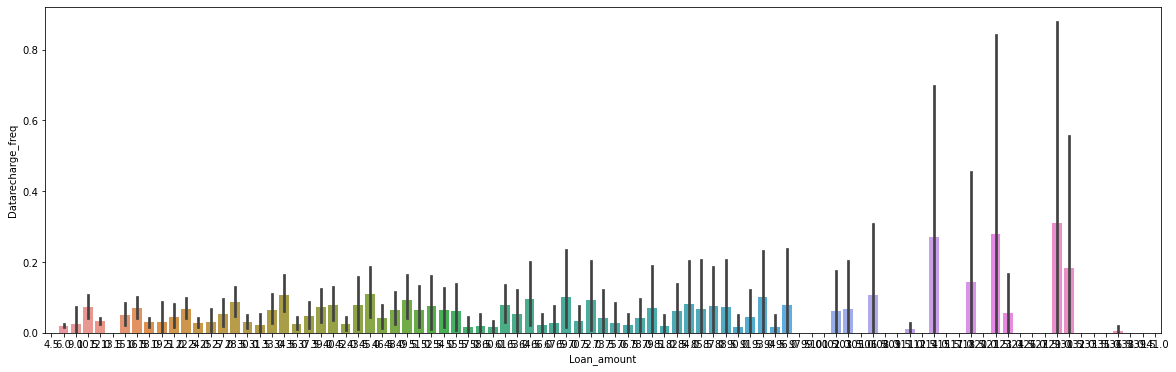

In [73]:
plt.figure(figsize=(20,6))
sns.barplot(x ='Loan_amount', y ='Datarecharge_freq',data = df)

In [74]:
df.skew()

Loan_repayment               -2.229089
Age_of_network                0.948053
last_recharge_main-ac         3.119710
last_recharge_data-ac         9.691548
Last_recharge_amount          2.191578
Median_of_mainacc-balance     4.848952
Daily_spent                   2.443162
main_balance                  2.572661
No_of_recharge                1.800109
Loan_amount                   2.122759
No_of_loan                   68.547162
Median_amount                 2.378288
Max_amount                   40.846386
Avg_paybacktime               3.528474
Med_amount                    4.377930
Datarecharge_freq            27.034317
Datarecharge_No              37.669912
dtype: float64

Here we can see that there is high skewness in some data. so we need to remove it. 

### Skewness removal

In [75]:
from scipy.stats import boxcox
for col in df:
    if df[col].skew()>=2:
        df[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df[col].skew()<=-1:
        df[col]=np.power(df[col],2)
        

### Outlier removel

In [76]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score< 5).all(axis=1)]
print(df_1.shape)

(193685, 17)
(188952, 17)


In [77]:
df.skew()

#here we can see that most of skewness are removed

Loan_repayment               -2.229089
Age_of_network                0.948053
last_recharge_main-ac        -0.514002
last_recharge_data-ac         6.465026
Last_recharge_amount         -0.502355
Median_of_mainacc-balance    -0.110192
Daily_spent                   0.508999
main_balance                  0.029344
No_of_recharge                1.800109
Loan_amount                   0.890252
No_of_loan                    1.951402
Median_amount                -0.652029
Max_amount                   28.624005
Avg_paybacktime               0.364592
Med_amount                    3.641728
Datarecharge_freq            17.262908
Datarecharge_No              27.798655
dtype: float64

In [78]:
df.columns

Index(['Loan_repayment', 'Age_of_network', 'last_recharge_main-ac',
       'last_recharge_data-ac', 'Last_recharge_amount',
       'Median_of_mainacc-balance', 'Daily_spent', 'main_balance',
       'No_of_recharge', 'Loan_amount', 'No_of_loan', 'Median_amount',
       'Max_amount', 'Avg_paybacktime', 'Med_amount', 'Datarecharge_freq',
       'Datarecharge_No'],
      dtype='object')

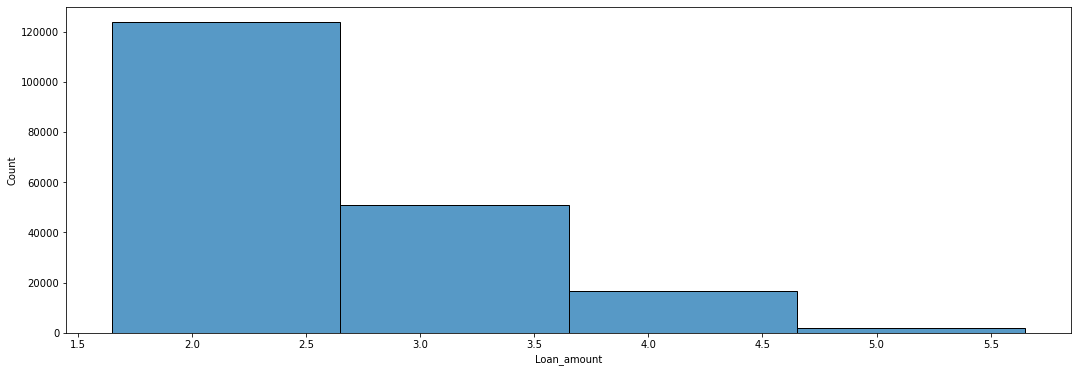

In [79]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Loan_amount", binwidth=1)

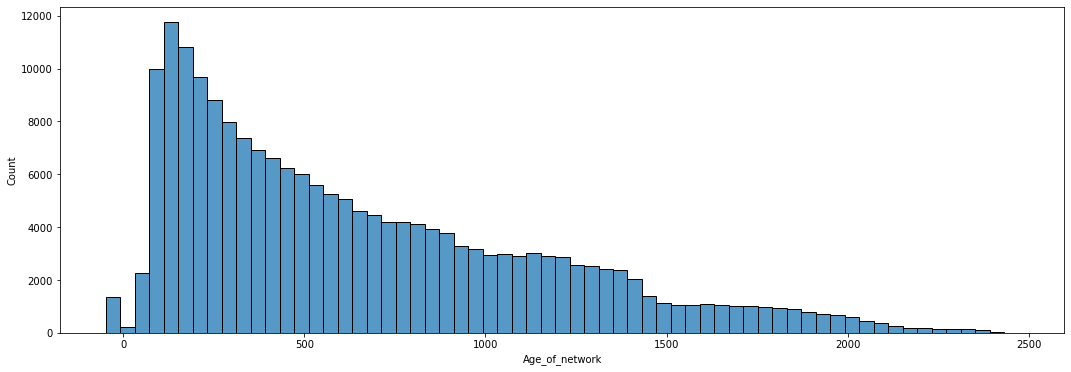

In [80]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x="Age_of_network", binwidth=40)

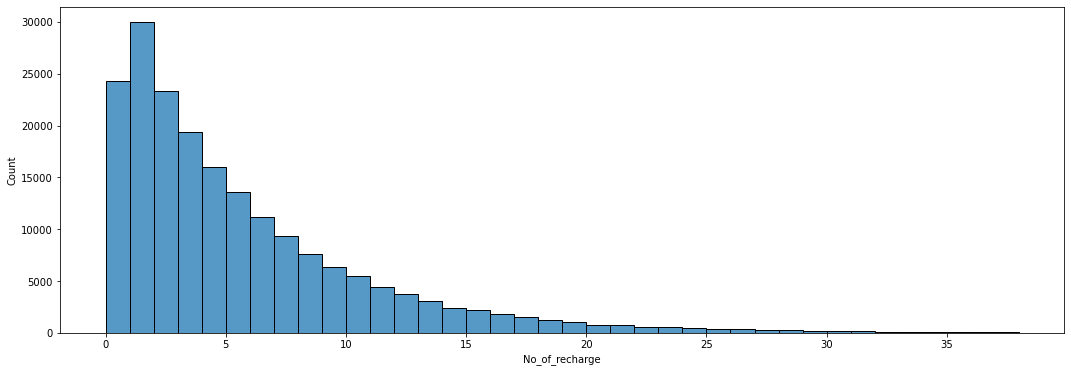

In [81]:

plt.figure(figsize=(18,6))
sns.histplot(data=df, x="No_of_recharge", binwidth=1)

In [82]:
df.drop(['Last_recharge_amount','Loan_amount'],inplace = True,axis=1)

In [83]:
x =df.drop('Loan_repayment',axis=1)
y =df.Loan_repayment

### PRE PROCESSING FOR MODEL BUILDING 

#### Standard scaling 

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [85]:
x.shape, y.shape , x_scaled.shape

((193685, 14), (193685,), (193685, 14))

#### Variance inflation factor

VIF is used to check multicollinearity in data because If multi multicollinearity available in data then it affect to accuracy

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns

In [87]:
vif

,vif,Features
0,1.017652,Age_of_network
1,1.340889,last_recharge_main-ac
2,1.178244,last_recharge_data-ac
3,1.387040,Median_of_mainacc-balance
4,2.237092,Daily_spent
5,1.617695,main_balance
6,2.745454,No_of_recharge
7,3.018573,No_of_loan
8,1.757443,Median_amount
9,1.031832,Max_amount


Now our data is ready for model building as we remove outlier, skewness. all data are in int64 or float data type. we visulise relations.

In [88]:
from sklearn.model_selection import train_test_split

xscaled_train,xscaled_test,yscaled_train,yscaled_test = train_test_split(x_scaled,y,train_size = 0.7)

### PCA
 As we have big data, by using PCA method we will define usefull columns which are related to target and according to it we will reduce our data size by column

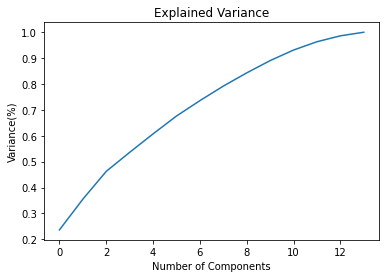

In [89]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

In [90]:
#as we can see that 10 columns covering nearly 90% data so we will now go ahead with 10 columns

pca = PCA(n_components = 10)
new_data = pca.fit_transform(x_scaled)
pri_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
pri_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,0.080533,0.548021,-0.103196,-0.568772,-0.541699,-0.019195,0.239072,-0.452411,2.012407,0.276561
1,0.498481,-2.244232,-0.420646,0.949969,0.469738,1.301944,-0.533611,1.103909,0.024826,0.126384
2,-1.123414,-0.827273,-0.208627,-0.008185,-0.138364,0.431557,-0.237367,0.312067,-0.580722,-0.020990
3,-1.805786,-1.005134,-0.196502,-0.360006,-0.520939,0.722299,-0.372277,0.705775,1.138342,0.221583
4,0.747062,0.106167,-0.310763,-0.767606,0.422137,-0.126496,0.368997,-0.693604,0.324565,0.142191
...,...,...,...,...,...,...,...,...,...,...
193680,-0.397660,-0.535362,-0.289216,-0.367280,-0.538401,0.196633,0.144216,-0.485720,-0.111087,0.082559
193681,-0.155930,-0.208941,-0.259416,-0.549631,0.665736,-0.043734,0.231563,-0.499412,-0.359079,0.034813
193682,2.195707,0.581697,-0.171800,0.680866,0.776873,0.479600,-0.033663,0.203124,-0.040599,0.084028
193683,1.666972,-0.910274,4.858425,0.170083,1.932913,0.118348,2.119468,-0.260135,0.495565,-4.182450


In [91]:
prix_train,prix_test,priy_train,priy_test = train_test_split(pri_x,y,train_size = 0.7)

In [92]:
prix_train.shape,priy_train.shape,prix_test.shape

((135579, 10), (135579,), (58106, 10))

In [93]:
from imblearn.under_sampling import NearMiss

In [94]:
nm = NearMiss(sampling_strategy='auto')
x_bal,y_bal = nm.fit_sample(prix_train,priy_train)

In [95]:
x_bal.shape,y_bal.shape

((34648, 10), (34648,))

In [96]:
from collections import Counter

In [97]:
print("original{}",format(Counter(priy_train)))
print("resampled{}",format(Counter(y_bal)))

original{} Counter({1: 118255, 0: 17324})
resampled{} Counter({0: 17324, 1: 17324})


In [98]:
x_bal.isnull().sum()

PC-1     0
PC-2     0
PC-3     0
PC-4     0
PC-5     0
PC-6     0
PC-7     0
PC-8     0
PC-9     0
PC-10    0
dtype: int64

In [99]:
y_bal.isnull().sum()

0

In [100]:
xbal_train,xbal_test,ybal_train,ybal_test = train_test_split(x_bal,y_bal,train_size = 0.7)

## Import models

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [102]:
dtc=DecisionTreeClassifier()
svc=SVC()
l_svc = LinearSVC()
kn=KNeighborsClassifier(n_neighbors=5)
gb = GaussianNB()
sgd = SGDClassifier()
rf = RandomForestClassifier(n_estimators=100)
lg=LogisticRegression()

# scaled with PCA

prix_train.shape,priy_train.shape,prix_test.shape

In [103]:
def fun(f):
    f.fit(prix_train,priy_train)
    pred=f.predict(prix_test)
    print('training Score',f.score(prix_train,priy_train))
    print('Accuracy Score\n',accuracy_score(priy_test,pred))
    print('Confusion Matrix\n',confusion_matrix(priy_test,pred))
    print('Classification Report',classification_report(priy_test,pred))
    print('f1_score',f1_score(priy_test,pred))

In [104]:
dtc1=DecisionTreeClassifier()
kn1=KNeighborsClassifier(n_neighbors=5)
gb1 = GaussianNB()
sgd1 = SGDClassifier()
rf1 = RandomForestClassifier(n_estimators=100)
lg1 =LogisticRegression()

In [105]:
fun(lg1)

training Score 0.8741250488644997
Accuracy Score
 0.873593088493443
Confusion Matrix
 [[  461  6976]
 [  369 50300]]
Classification Report               precision    recall  f1-score   support

           0       0.56      0.06      0.11      7437
           1       0.88      0.99      0.93     50669

    accuracy                           0.87     58106
   macro avg       0.72      0.53      0.52     58106
weighted avg       0.84      0.87      0.83     58106

f1_score 0.9319560887488999


In [106]:
fun(dtc1)

training Score 0.999675465964493
Accuracy Score
 0.8481396069252745
Confusion Matrix
 [[ 3282  4155]
 [ 4669 46000]]
Classification Report               precision    recall  f1-score   support

           0       0.41      0.44      0.43      7437
           1       0.92      0.91      0.91     50669

    accuracy                           0.85     58106
   macro avg       0.66      0.67      0.67     58106
weighted avg       0.85      0.85      0.85     58106

f1_score 0.9124811552804887


In [107]:
fun(kn1)

training Score 0.9137182011963505
Accuracy Score
 0.8900285684782983
Confusion Matrix
 [[ 2720  4717]
 [ 1673 48996]]
Classification Report               precision    recall  f1-score   support

           0       0.62      0.37      0.46      7437
           1       0.91      0.97      0.94     50669

    accuracy                           0.89     58106
   macro avg       0.77      0.67      0.70     58106
weighted avg       0.87      0.89      0.88     58106

f1_score 0.9387825487152958


In [108]:
fun(gb1)

training Score 0.8644406582140302
Accuracy Score
 0.8660723505317868
Confusion Matrix
 [[ 2712  4725]
 [ 3057 47612]]
Classification Report               precision    recall  f1-score   support

           0       0.47      0.36      0.41      7437
           1       0.91      0.94      0.92     50669

    accuracy                           0.87     58106
   macro avg       0.69      0.65      0.67     58106
weighted avg       0.85      0.87      0.86     58106

f1_score 0.9244510028542027


In [109]:
fun(sgd1)

training Score 0.8722220992926634
Accuracy Score
 0.8720097752383574
Confusion Matrix
 [[    0  7437]
 [    0 50669]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7437
           1       0.87      1.00      0.93     50669

    accuracy                           0.87     58106
   macro avg       0.44      0.50      0.47     58106
weighted avg       0.76      0.87      0.81     58106

f1_score 0.9316295104573662


In [110]:
fun(rf1)
pred=rf1.predict(prix_test)

training Score 0.9996607144174245
Accuracy Score
 0.9007675627301828
Confusion Matrix
 [[ 2710  4727]
 [ 1039 49630]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.36      0.48      7437
           1       0.91      0.98      0.95     50669

    accuracy                           0.90     58106
   macro avg       0.82      0.67      0.71     58106
weighted avg       0.89      0.90      0.89     58106

f1_score 0.9450993087425971


In [111]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

ad1 = AdaBoostClassifier()
gd1 = GradientBoostingClassifier()

In [112]:
fun(ad1)
pred=ad1.predict(prix_test)

training Score 0.8831898745380922
Accuracy Score
 0.8831445978040133
Confusion Matrix
 [[ 1842  5595]
 [ 1195 49474]]
Classification Report               precision    recall  f1-score   support

           0       0.61      0.25      0.35      7437
           1       0.90      0.98      0.94     50669

    accuracy                           0.88     58106
   macro avg       0.75      0.61      0.64     58106
weighted avg       0.86      0.88      0.86     58106

f1_score 0.9357846753295883


In [113]:
fun(gd1)
pred=gd1.predict(prix_test)

training Score 0.8916203836877392
Accuracy Score
 0.8915258320999553
Confusion Matrix
 [[ 1921  5516]
 [  787 49882]]
Classification Report               precision    recall  f1-score   support

           0       0.71      0.26      0.38      7437
           1       0.90      0.98      0.94     50669

    accuracy                           0.89     58106
   macro avg       0.80      0.62      0.66     58106
weighted avg       0.88      0.89      0.87     58106

f1_score 0.9405752967463962


In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [115]:
score=cross_val_score(lg1,prix_test,priy_test,cv=10)
print('lg1',score.mean())
score=cross_val_score(dtc1,prix_test,priy_test,cv=10)
print('dtc1',score.mean())
score=cross_val_score(kn1,prix_test,priy_test,cv=10)
print('knn1',score.mean())
score=cross_val_score(gb1,prix_test,priy_test,cv=10)
print('gb1',score.mean())
score=cross_val_score(rf1,prix_test,priy_test,cv=10)
print('rf1',score.mean())
score=cross_val_score(ad1,prix_test,priy_test,cv=10)
print('ad1',score.mean())
score=cross_val_score(gd1,prix_test,priy_test,cv=10)
print('gd1',score.mean())

lg1 0.8754002217291618
dtc1 0.8447838199912269
knn1 0.887429887704813
gb1 0.8542835520857676
rf1 0.8981000571353931
ad1 0.8837814951819964
gd1 0.8910611721907914


### WITH SCALING,PCA AND BALANCING

In [116]:
dtc2=DecisionTreeClassifier()
kn2=KNeighborsClassifier(n_neighbors=5)
gb2 = GaussianNB()
sgd2 = SGDClassifier()
rf2 = RandomForestClassifier(n_estimators=100)
lg2 =LogisticRegression()

In [117]:
def fun(f):
    f.fit(xbal_train,ybal_train)
    pred=f.predict(xbal_test)
    print('training Score',f.score(xbal_train,ybal_train))
    print('Accuracy Score\n',accuracy_score(ybal_test,pred))
    print('Confusion Matrix\n',confusion_matrix(ybal_test,pred))
    print('Classification Report',classification_report(ybal_test,pred))
    print('f1_score',f1_score(ybal_test,pred))

In [118]:
fun(lg2)

training Score 0.6115532099121758
Accuracy Score
 0.6092352092352092
Confusion Matrix
 [[2682 2508]
 [1554 3651]]
Classification Report               precision    recall  f1-score   support

           0       0.63      0.52      0.57      5190
           1       0.59      0.70      0.64      5205

    accuracy                           0.61     10395
   macro avg       0.61      0.61      0.61     10395
weighted avg       0.61      0.61      0.61     10395

f1_score 0.6425554382259767


In [119]:
fun(dtc2)

training Score 0.9990104316991713
Accuracy Score
 0.6905242905242905
Confusion Matrix
 [[3609 1581]
 [1636 3569]]
Classification Report               precision    recall  f1-score   support

           0       0.69      0.70      0.69      5190
           1       0.69      0.69      0.69      5205

    accuracy                           0.69     10395
   macro avg       0.69      0.69      0.69     10395
weighted avg       0.69      0.69      0.69     10395

f1_score 0.6893288266537905


In [120]:
fun(kn2)

training Score 0.8052199727868717
Accuracy Score
 0.7256373256373256
Confusion Matrix
 [[3408 1782]
 [1070 4135]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.66      0.71      5190
           1       0.70      0.79      0.74      5205

    accuracy                           0.73     10395
   macro avg       0.73      0.73      0.72     10395
weighted avg       0.73      0.73      0.72     10395

f1_score 0.7435713001258765


In [121]:
fun(gb2)

training Score 0.5965859893621408
Accuracy Score
 0.5985569985569985
Confusion Matrix
 [[1334 3856]
 [ 317 4888]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.26      0.39      5190
           1       0.56      0.94      0.70      5205

    accuracy                           0.60     10395
   macro avg       0.68      0.60      0.55     10395
weighted avg       0.68      0.60      0.55     10395

f1_score 0.7008387698042872


In [122]:
fun(sgd2)

training Score 0.6209128767575145
Accuracy Score
 0.6192400192400193
Confusion Matrix
 [[1563 3627]
 [ 331 4874]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.30      0.44      5190
           1       0.57      0.94      0.71      5205

    accuracy                           0.62     10395
   macro avg       0.70      0.62      0.58     10395
weighted avg       0.70      0.62      0.58     10395

f1_score 0.7112213629067562


In [123]:
fun(rf2)
pred=rf2.predict(xbal_test)

training Score 0.9990104316991713
Accuracy Score
 0.7662337662337663
Confusion Matrix
 [[3742 1448]
 [ 982 4223]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.72      0.75      5190
           1       0.74      0.81      0.78      5205

    accuracy                           0.77     10395
   macro avg       0.77      0.77      0.77     10395
weighted avg       0.77      0.77      0.77     10395

f1_score 0.7765722692166237


In [124]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

ad2 = AdaBoostClassifier()
gd2 = GradientBoostingClassifier()

In [125]:
fun(ad2)
pred=ad2.predict(xbal_test)

training Score 0.7106337360326558
Accuracy Score
 0.7003367003367004
Confusion Matrix
 [[3292 1898]
 [1217 3988]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.63      0.68      5190
           1       0.68      0.77      0.72      5205

    accuracy                           0.70     10395
   macro avg       0.70      0.70      0.70     10395
weighted avg       0.70      0.70      0.70     10395

f1_score 0.7191416463799477


In [126]:
fun(gd2)
pred=gd2.predict(xbal_test)

training Score 0.7470828351131819
Accuracy Score
 0.7316017316017316
Confusion Matrix
 [[3372 1818]
 [ 972 4233]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.65      0.71      5190
           1       0.70      0.81      0.75      5205

    accuracy                           0.73     10395
   macro avg       0.74      0.73      0.73     10395
weighted avg       0.74      0.73      0.73     10395

f1_score 0.752132196162047


In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [128]:
score=cross_val_score(lg2,xbal_test,ybal_test,cv=10)
print('lg2',score.mean())
score=cross_val_score(dtc2,xbal_test,ybal_test,cv=10)
print('dtc2',score.mean())
score=cross_val_score(kn2,xbal_test,ybal_test,cv=10)
print('knn2',score.mean())
score=cross_val_score(gb2,xbal_test,ybal_test,cv=10)
print('gb2',score.mean())
score=cross_val_score(rf2,xbal_test,ybal_test,cv=10)
print('rf2',score.mean())
score=cross_val_score(ad2,xbal_test,ybal_test,cv=10)
print('ad2',score.mean())
score=cross_val_score(gd2,xbal_test,ybal_test,cv=10)
print('gd2',score.mean())

lg2 0.6091379469904494
dtc2 0.6910063300510846
knn2 0.7131316169393648
gb2 0.6002904975198045
rf2 0.758921114977419
ad2 0.6973550751462205
gd2 0.7378524098615533


In [129]:
rndf1=RandomForestClassifier(max_depth=10,max_features='sqrt',n_estimators=100)
fun(rf1)

training Score 0.9989279676741022
Accuracy Score
 0.7630591630591631
Confusion Matrix
 [[3724 1466]
 [ 997 4208]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.72      0.75      5190
           1       0.74      0.81      0.77      5205

    accuracy                           0.76     10395
   macro avg       0.77      0.76      0.76     10395
weighted avg       0.77      0.76      0.76     10395

f1_score 0.7736005147531942


In [130]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [131]:
rf = RandomForestClassifier()

In [132]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 50, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [137]:
rf_random.fit(prix_train, priy_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 29.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [138]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}  



In [141]:
randmf = RandomForestClassifier(n_estimators = 100, min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 120, bootstrap=False) 

training Score 0.9816517544221334
Accuracy Score
 0.767965367965368
Confusion Matrix
 [[3714 1476]
 [ 936 4269]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.72      0.75      5190
           1       0.74      0.82      0.78      5205

    accuracy                           0.77     10395
   macro avg       0.77      0.77      0.77     10395
weighted avg       0.77      0.77      0.77     10395

f1_score 0.7797260273972603


In [142]:
    randmf.fit(prix_train,priy_train)
    pred=randmf.predict(prix_test)
    print('training Score',randmf.score(prix_train,priy_train))
    print('Accuracy Score\n',accuracy_score(priy_test,pred))
    print('Confusion Matrix\n',confusion_matrix(priy_test,pred))
    print('Classification Report',classification_report(priy_test,pred))
    print('f1_score',f1_score(priy_test,pred))

training Score 0.9789642938803207
Accuracy Score
 0.9007847726568685
Confusion Matrix
 [[ 2695  4742]
 [ 1023 49646]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.36      0.48      7437
           1       0.91      0.98      0.95     50669

    accuracy                           0.90     58106
   macro avg       0.82      0.67      0.71     58106
weighted avg       0.89      0.90      0.89     58106

f1_score 0.9451250273660965


In [143]:
estimator=[]

estimator.append(('rf1',LogisticRegression()))
estimator.append(('gd1',DecisionTreeClassifier()))
estimator.append(('ad1',KNeighborsClassifier()))
estimator.append(('rndmf',KNeighborsClassifier()))

In [145]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

In [146]:
voting_hard=VotingClassifier(estimators=estimator,voting='hard')
voting_hard.fit(prix_train,priy_train)
y_pred=voting_hard.predict(prix_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(priy_test,y_pred))
print('hard voting score % d'%score)

[1 1 1 ... 1 1 1]
hard voting score  0


In [162]:
y_pred_prob=randmf.predict_proba(prix_test)[:,1]
y_pred_prob

array([0.995     , 0.87830952, 0.75809524, ..., 0.90230952, 0.89333333,
       0.92814286])

In [163]:
fpr,tpr,thresolds=roc_curve(priy_test,y_pred_prob)
print('ROC Score',roc_auc_score(priy_test,pred))

ROC Score 0.6710937214991477


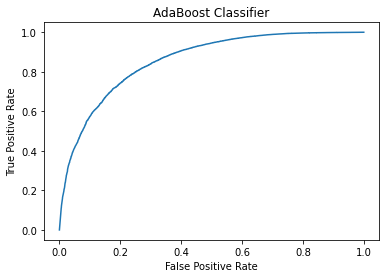

In [164]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier')
plt.show()

In [165]:
import pickle
filename='credit.pkl'
pickle.dump(randmf,open(filename,'wb'))

        Actual  Predict
29091        1        1
4996         0        1
147510       0        1
188953       1        1
72175        1        1
...        ...      ...
102103       1        1
90163        1        1
168131       0        1
184732       1        1
95506        1        1

[58106 rows x 2 columns]


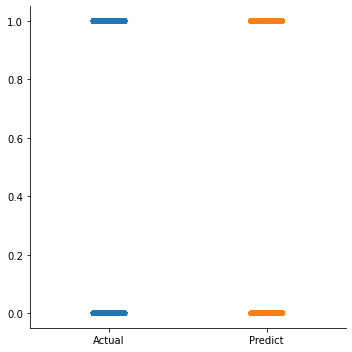

In [167]:
res=pd.DataFrame()
res['Actual']=priy_test
res['Predict']=randmf.predict(prix_test)
print(res)
sns.catplot(data=res)